In [2]:
from PIL import Image
import os

def resize_images_inplace(input_dir, target_size=(224, 224)):
    # Iterate over each file in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Adjust file extensions as needed
            # Open the image file
            img_path = os.path.join(input_dir, file_name)
            img = Image.open(img_path)
            
            # Resize the image to 224x224 for ResNet input using LANCZOS
            resized_img = img.resize(target_size, Image.LANCZOS)
            
            # Save the resized image in place (overwrite)
            resized_img.save(img_path)
            print(f"Resized and replaced: {file_name}")


input_dir = r'C:\Users\HP PC\Downloads\Celebs'
resize_images_inplace(input_dir)

print("image resized less goo")



Resized and replaced: 39fd193d-2e0e-4585-8d97-df8d36efb982.jpeg
Resized and replaced: 40 Captivating Photos Of Celebrities Back In The Day That You May Have Never Seen Before.jpeg
Resized and replaced: 40 Hottest Women in Kannada Film Industry (Sandalwood).jpeg
Resized and replaced: 7c4f4256-e951-41d0-9952-c27bfb541d2f.jpeg
Resized and replaced: Actress Sunny leone.jpeg
Resized and replaced: Because one can never see Carrie Fisher sitting on___.jpeg
Resized and replaced: Bollwood actor Kartik Aaryan poses during the promotion of Sonu Ke___.jpeg
Resized and replaced: Check more at….jpeg
Resized and replaced: Enza Costa Slub Rib Cap Sleeve Tee.jpeg
Resized and replaced: Jennifer Lawrence.jpeg
Resized and replaced: Keanu Reeves.jpeg
Resized and replaced: Keira Knightley.jpeg
Resized and replaced: Leonardo DiCaprio wows Cannes with 'best performance of his career'.jpeg
Resized and replaced: Michelle Trachtenberg Poster Bw #2 24inx36in.jpeg
Resized and replaced: Rajinikanth ⭐⭐⭐⭐.jpeg
Resize

In [31]:
from PIL import Image
import os

def resize_and_store_images(input_dir, output_dir, target_size=(224, 224), max_images=200):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Counter to track how many images have been processed
    processed_count = 0
    
    # Iterate over each file in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):  # Adjust file extensions as needed
            # Stop the process if 200 images have been processed
            if processed_count >= max_images:
                print(f"Stopped after processing {max_images} images.")
                break

            # Open the image file
            img_path = os.path.join(input_dir, file_name)
            img = Image.open(img_path)
            
            # Resize the image to 224x224 for ResNet input using LANCZOS
            resized_img = img.resize(target_size, Image.LANCZOS)
            
            # Save the resized image to the output directory
            output_path = os.path.join(output_dir, file_name)
            resized_img.save(output_path)
            
            # Print progress
            print(f"Resized and saved: {file_name}")
            
            # Increment the processed image counter
            processed_count += 1

# Example usage:
input_dir = r'C:\Users\HP PC\Downloads\100k\100k'  # Path to your original images
output_dir = r'C:\Users\HP PC\Downloads\Celebs_Resized'  # Path to store resized images
resize_and_store_images(input_dir, output_dir)

print("Image resizing complete.")


Resized and saved: 000008.jpg
Resized and saved: 000009.jpg
Resized and saved: 000020.jpg
Resized and saved: 000021.jpg
Resized and saved: 000022.jpg
Resized and saved: 000024.jpg
Resized and saved: 000026.jpg
Resized and saved: 000030.jpg
Resized and saved: 000033.jpg
Resized and saved: 000035.jpg
Resized and saved: 000036.jpg
Resized and saved: 000037.jpg
Resized and saved: 000044.jpg
Resized and saved: 000046.jpg
Resized and saved: 000047.jpg
Resized and saved: 000050.jpg
Resized and saved: 000078.jpg
Resized and saved: 000079.jpg
Resized and saved: 000084.jpg
Resized and saved: 000085.jpg
Resized and saved: 000086.jpg
Resized and saved: 000090.jpg
Resized and saved: 000091.jpg
Resized and saved: 000093.jpg
Resized and saved: 000118.jpg
Resized and saved: 000123.jpg
Resized and saved: 000124.jpg
Resized and saved: 000125.jpg
Resized and saved: 000132.jpg
Resized and saved: 000133.jpg
Resized and saved: 000137.jpg
Resized and saved: 000141.jpg
Resized and saved: 000143.jpg
Resized an

In [52]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os

# Load the pretrained ResNet50 model without the top classification layer
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess and embed image
def get_image_embedding(img_path):
    img = Image.open(img_path).convert('L')  # 'L' for grayscale
    
    # Resize the image to 224x224 (or whatever your model requires)
    img = img.resize((224, 224))
    
    # Convert the grayscale image back to a 3-channel format (since models like ResNet expect 3 channels)
    img = np.stack([img] * 3, axis=-1)  # Make it 3-channel grayscale

    # Convert to array and expand dimensions to match the input shape of the model
    img_array = np.expand_dims(np.array(img), axis=0)

    # Normalize the pixel values (you can adjust this as per your model requirements)
    img_array = img_array / 255.0
    # Get the embeddings (feature vectors) - output is (1, 2048), need to squeeze it
    features = model.predict(img_array)
    embedding = np.squeeze(features)  # Remove the batch dimension
    return embedding

# Function to apply embedding to all images and store in a list
def embed_images_to_list(input_dir):
    embeddings_list = []  # List to store embeddings
    
    # Iterate over each image file in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):  # Adjust file extensions as needed
            img_path = os.path.join(input_dir, file_name)
            
            # Get image embedding
            embedding = get_image_embedding(img_path)
            
            # Append (file_name, embedding) to the list
            embeddings_list.append((file_name, embedding))
            
            print(f"Processed embedding for: {file_name}")
    
    return embeddings_list

# Example usage:
input_dir = r'C:\Users\HP PC\Downloads\Celebs_Resized'  # Directory with resized images
embeddings_list = embed_images_to_list(input_dir)

# Now 'embeddings_list' contains tuples of (file_name, embedding)
print("Embeddings list prepared successfully!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Processed embedding for: 000008.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Processed embedding for: 000009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processed embedding for: 000020.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Processed embedding for: 000021.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Processed embedding for: 000022.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Processed embedding for: 000024.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Processed embedding for: 000026.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Processed embedding for: 000030.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Processed embedding for: 000033.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Processed embedding for: 000035.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Processed embedding for: 000036.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Processed embedding for: 000037.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Processed embedding for: 000044.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480

In [53]:
a=5
a

5

In [54]:
import tensorflow as tf



embeddings_array = np.array([embedding for _, embedding in embeddings_list])


embeddings_tensor = tf.convert_to_tensor(embeddings_array, dtype=tf.float32)


tensor_shape = embeddings_tensor.shape

print("Embeddings Tensor Shape:", tensor_shape)

Embeddings Tensor Shape: (200, 2048)


In [55]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

# Load the pretrained ResNet50 model without the top classification layer
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess and embed image
def get_image_embedding(img_path):
    img = Image.open(img_path).convert('L')  # 'L' for grayscale
    
    # Resize the image to 224x224 (or whatever your model requires)
    img = img.resize((224, 224))
    
    # Convert the grayscale image back to a 3-channel format (since models like ResNet expect 3 channels)
    img = np.stack([img] * 3, axis=-1)  # Make it 3-channel grayscale

    # Convert to array and expand dimensions to match the input shape of the model
    img_array = np.expand_dims(np.array(img), axis=0)

    # Normalize the pixel values (you can adjust this as per your model requirements)
    img_array = img_array / 255.0
    # Get the embeddings (feature vectors) - output is (1, 2048), need to squeeze it
    features = model.predict(img_array)
    embedding = np.squeeze(features)  # Remove the batch dimension
    return embedding


# Function to compute cosine similarity between a new embedding and stored embeddings tensor
def compute_similarity(new_embedding, embeddings_tensor, file_names):
    # Compute cosine similarity between the new image embedding and each stored embedding
    similarities = cosine_similarity([new_embedding], embeddings_tensor)[0]  # Compute similarity

    # Pair each similarity score with the corresponding file name
    similarity_results = list(zip(file_names, similarities))

    # Sort the list based on similarity score in descending order
    similarity_results.sort(key=lambda x: x[1], reverse=True)
    
    return similarity_results

# Function to display images side by side
def display_images(new_image_path, closest_image_path):
    # Load and display the new image
    new_img = image.load_img(new_image_path, target_size=(224, 224))
    
    # Load and display the closest image
    closest_img = image.load_img(closest_image_path, target_size=(224, 224))
    
    # Plot both images side by side for comparison
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # New image
    axes[0].imshow(new_img)
    axes[0].axis('off')
    axes[0].set_title("New Image")
    
    # Closest match
    axes[1].imshow(closest_img)
    axes[1].axis('off')
    axes[1].set_title("Closest Match")
    
    plt.show()


file_names = [file_name for file_name, _ in embeddings_list]  # Extract file names
embeddings_array = np.array([embedding for _, embedding in embeddings_list])  # Extract embeddings
embeddings_tensor = tf.convert_to_tensor(embeddings_array, dtype=tf.float32)  # Convert to tensor


# Path to your new image
new_image_path = new_image_path = r"C:\Users\HP PC\Downloads\IMG_20240708_080426_757.jpg"


# Step 1: Get the embedding of the new image
new_embedding = get_image_embedding(new_image_path)

# Step 2: Compute similarity with the stored embeddings tensor
similarity_results = compute_similarity(new_embedding, embeddings_tensor, file_names)

# Step 3: Display the new image and the closest match
closest_image_file = similarity_results[0][0]  # Get the closest match file name
closest_image_path = os.path.join(r'C:\Users\HP PC\Downloads\Celebs_Resized', closest_image_file)  # Path of the closest image

# Print similarity score
print(f"Closest image: {closest_image_file}, Similarity: {similarity_results[0][1]:.4f}")

# Step 4: Show the images
display_images(new_image_path, closest_image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP PC\\Downloads\\IMG_20240708_080426_757.jpg'

In [56]:
b.shape

(2048,)

In [57]:
import tensorflow as tf
import os
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



def display_images_in_grid(person_image_path, closest_image_path):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Load person image and closest match image
    person_image = Image.open(person_image_path)
    closest_image = Image.open(closest_image_path)

    # Display person image
    axes[0].imshow(person_image)
    axes[0].axis('off')
    axes[0].set_title('Person Image')
    
    # Display closest match image
    axes[1].imshow(closest_image)
    axes[1].axis('off')
    axes[1].set_title('Closest Match')

    plt.show()


# Precompute celeb embeddings and store them
celeb_file_names = [file_name for file_name in os.listdir(r'C:\Users\HP PC\Downloads\Celebs_Resized') if file_name.endswith('.jpg') or file_name.endswith('.png')]




# Convert celeb embeddings to a tensor
celeb_embeddings_tensor = embeddings_tensor

# Loop through the "People" directory
people_dir = r'C:\Users\HP PC\Downloads\attachments'
people_file_names = [file_name for file_name in os.listdir(people_dir) if file_name.endswith('.jpg') or file_name.endswith('.png')]

for person_file_name in people_file_names:
    # Path to the person's image
    person_image_path = os.path.join(people_dir, person_file_name)
    
    # Step 1: Get the embedding of the person's image
    person_embedding = get_image_embedding(person_image_path)

    # Step 2: Compute similarity with the celeb embeddings
    similarity_results = compute_similarity(person_embedding, celeb_embeddings_tensor, celeb_file_names)

    # Step 3: Get the closest match's file name and path
    closest_image_file = similarity_results[0][0]
    closest_image_path = os.path.join(r'C:\Users\HP PC\Downloads\Celebs_Resized', closest_image_file)

   

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


In [58]:
a=5
a

5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Person: IMG_20241011_222751.jpg, Closest image: 000811.jpg, Similarity: 0.9995


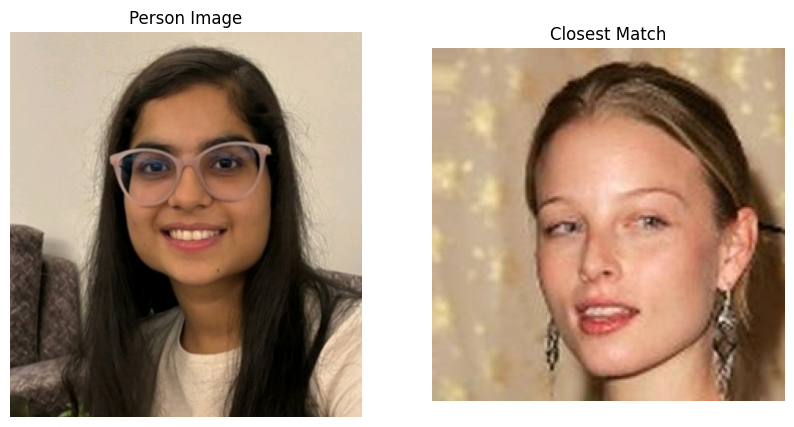

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Person: IMG_20241011_222820.jpg, Closest image: 000442.jpg, Similarity: 0.9998


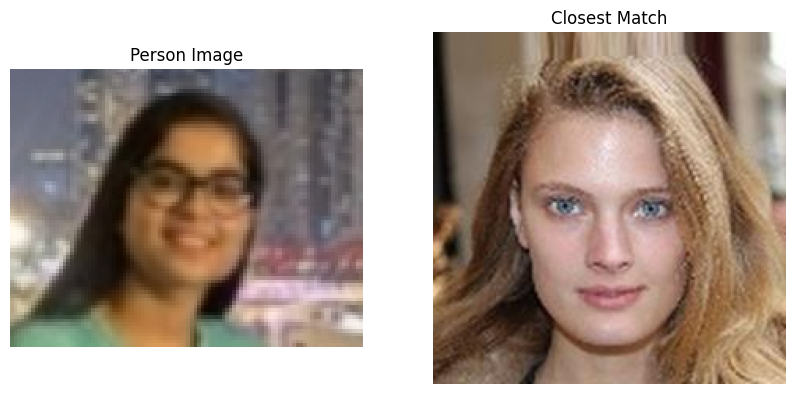

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Person: IMG_20241011_222847.jpg, Closest image: 000797.jpg, Similarity: 0.9998


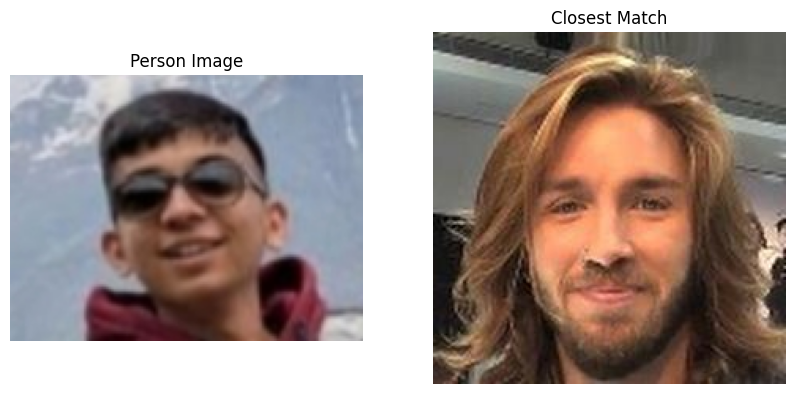

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Person: IMG_20241011_222931.jpg, Closest image: 000125.jpg, Similarity: 0.9998


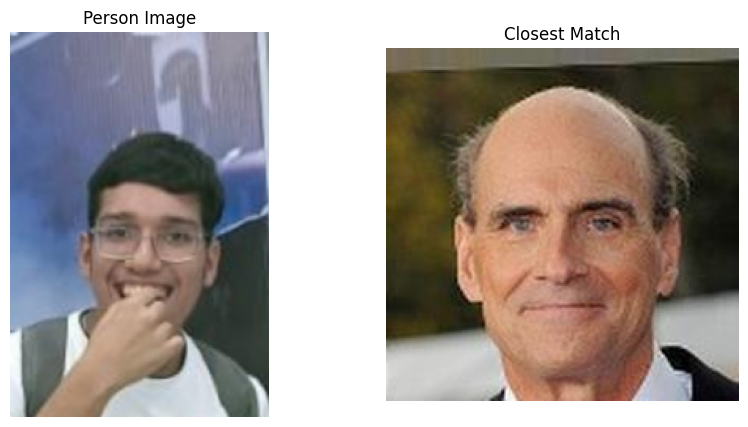

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Person: IMG_20241011_222956.jpg, Closest image: 000427.jpg, Similarity: 0.9995


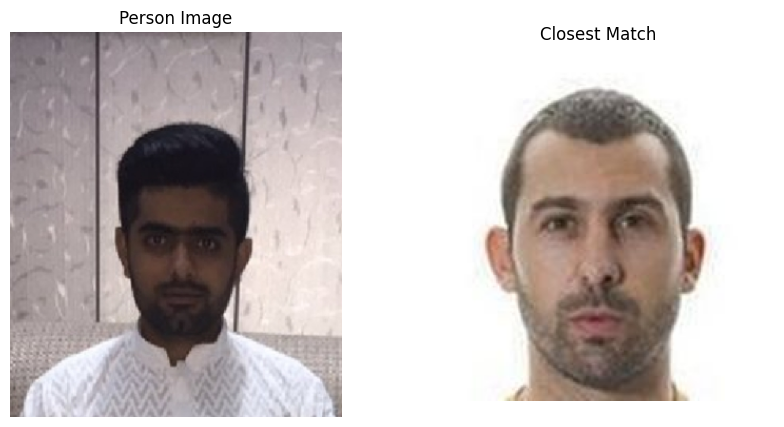

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Person: IMG_20241011_223023.jpg, Closest image: 000250.jpg, Similarity: 0.9986


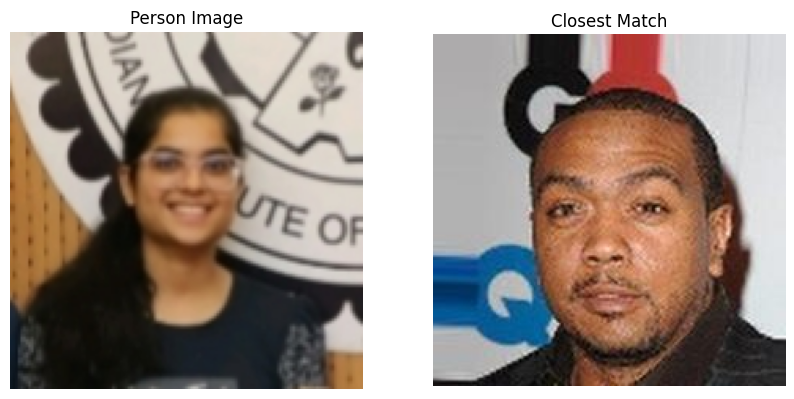

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Person: IMG_20241011_223111.jpg, Closest image: 000624.jpg, Similarity: 0.9995


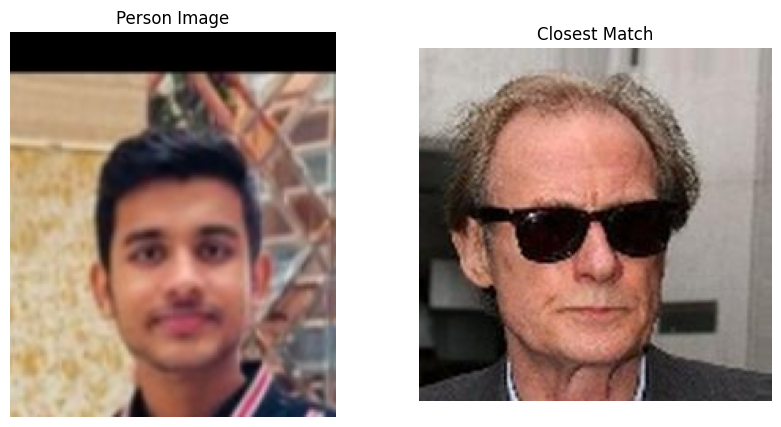

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Person: IMG_20241011_223143.jpg, Closest image: 000635.jpg, Similarity: 0.9995


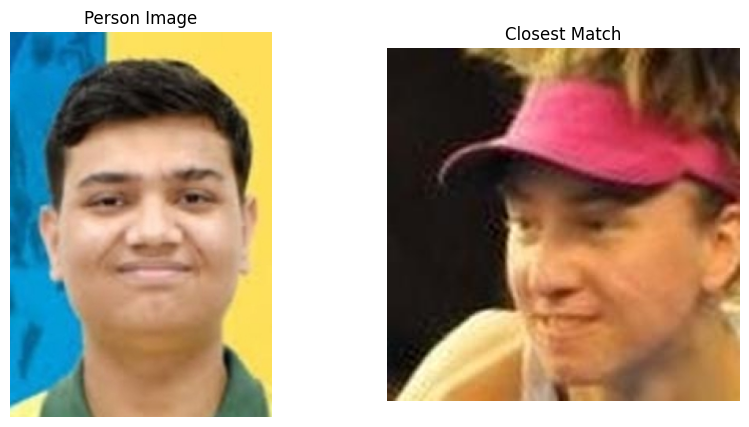

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Person: IMG_20241011_223239.jpg, Closest image: 000596.jpg, Similarity: 0.9998


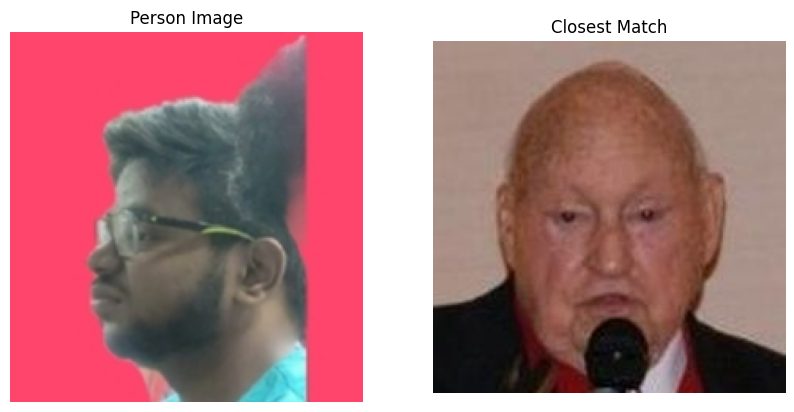

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Person: IMG_20241011_223318.jpg, Closest image: 000584.jpg, Similarity: 0.9991


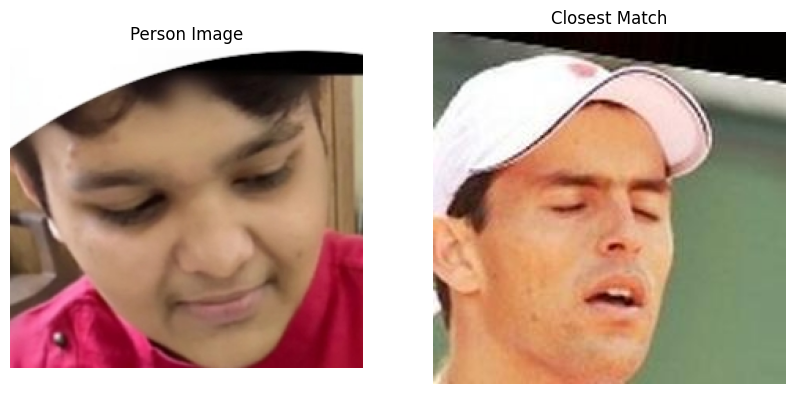

In [59]:
celeb_dir=r"C:\Users\HP PC\Downloads\Celebs_Resized"
for person_file_name in people_file_names:
    # Path to the person's image
    person_image_path = os.path.join(people_dir, person_file_name)
    
    # Step 1: Get the embedding of the person's image
    person_embedding = get_image_embedding(person_image_path)

    # Step 2: Compute similarity with the celeb embeddings
    similarity_results = compute_similarity(person_embedding, celeb_embeddings_tensor, celeb_file_names)

    # Step 3: Get the closest match's file name and path
    closest_image_file = similarity_results[0][0]
    closest_image_path = os.path.join(celeb_dir, closest_image_file)

    # Print the similarity score
    print(f"Person: {person_file_name}, Closest image: {closest_image_file}, Similarity: {similarity_results[0][1]:.4f}")
    
    # Step 4: Display the person image and the closest match
    display_images_in_grid(person_image_path, closest_image_path)